## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
students = pd.read_csv('Data/students-data-1.csv', sep=';')

In [29]:
students.shape

(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [30]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [31]:
students.index.name = 'number'

In [32]:
students.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

### From the above output, none of the colums are having any missing values.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [33]:
students.select_dtypes(include='object').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [34]:
students.select_dtypes(exclude='object').head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [35]:
students.select_dtypes(exclude='object').var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

### Before deleteing the featurs with Variance < 1, let's check the correlations of these features wrt the target G1, G2, G3

In [36]:
students.corr()[['G1', 'G2', 'G3']]

,G1,G2,G3
age,-0.064081,-0.143474,-0.161579
Medu,0.205341,0.215527,0.217147
Fedu,0.190270,0.164893,0.152457
traveltime,-0.093040,-0.153198,-0.117142
studytime,0.160612,0.135880,0.097820
failures,-0.354718,-0.355896,-0.360415
famrel,0.022168,-0.018281,0.051363
freetime,0.012613,-0.013777,0.011307
goout,-0.149104,-0.162250,-0.132791
Dalc,-0.094159,-0.064120,-0.054660


In [37]:
columns = students.select_dtypes(exclude='object')
for ii in columns:
    if (students[ii].var() < 1):
        students.drop(columns=ii, axis=1, inplace=True)
students.select_dtypes(exclude='object').var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

### Features: traveltime, studytime, failures, famrel, freetime, Dalc are dropped from the dataframe.
### These features have less variance which means, they have almost constant or non-spreading values and so, lesser impact on the target variables

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [38]:
students.select_dtypes(include='object').head(5)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [39]:
columns = students.select_dtypes(include='object').columns
columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [17]:
# Creating LabelEncoder
labelEncoder = preprocessing.LabelEncoder()

In [40]:
for ii in columns:
    students[ii] = labelEncoder.fit_transform(students[ii])
students.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [41]:
grades = ['G1', 'G2', 'G3']
for ii in grades:
    students[ii] = np.where(students[ii] < 10, 0, 1)
students.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [42]:
X = students.drop('G3', axis=1)
y = students['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

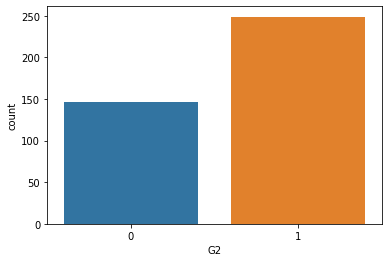

In [45]:
sns.countplot(students.G2)

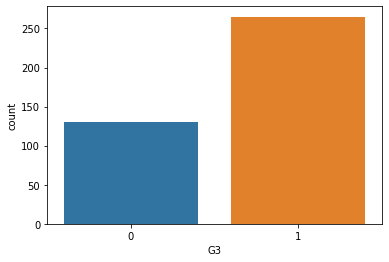

In [47]:
sns.countplot(students.G3)

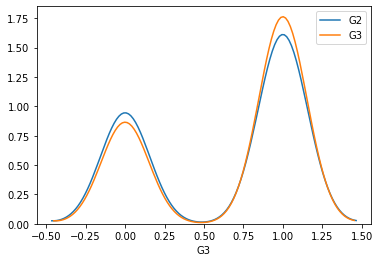

In [48]:
sns.distplot(students['G2'], hist=False, label='G2')
sns.distplot(students['G3'], hist=False, label='G3')

### Based on above Histogram and Distribution plots, G3 is greatly dependent on G2. Thus G2 can be good predictor of G3

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [49]:
students.school.unique()

array([0, 1], dtype=int64)

### Before encoding the "school" feature, we see, there are two schools GP and MS. After of encoding, GP gets the value of 0 and MS gets the value or 1

Number of students in GM School:  349
Number of students in MS School:  46


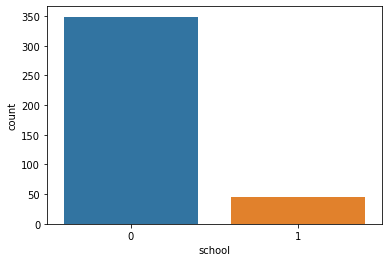

In [55]:
print('Number of students in GM School: ', len(students[students['school'] == 0]))
print('Number of students in MS School: ', len(students[students['school'] == 1]))
sns.countplot(students['school'])

In [56]:
students.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [57]:
students.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

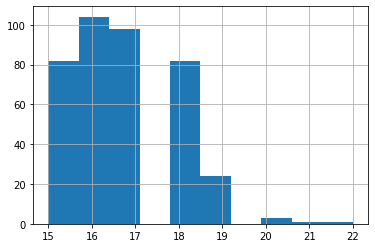

In [58]:
students['age'].hist()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300/len(X), random_state=1)
print('Number of train records', len(X_train))
print('Number of train records', len(X_test))

Number of train records 300
Number of train records 95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
predict = model.predict(X_test)

In [62]:
print('Accuracy of the training data: ', model.score(X_train, y_train))
print('Accuracy of the testing data: ', model.score(X_test, y_test))

Accuracy of the training data:  0.9333333333333333
Accuracy of the testing data:  0.9052631578947369


In [63]:
from sklearn.metrics import f1_score
print('F1 score of the model: ', f1_score(y_test, predict))

F1 score of the model:  0.931297709923664


# Naive bayes with Iris data

### Import Iris.csv

In [68]:
iris = pd.read_csv('Data/iris-R3Lab.csv')

### Adding one more step of Data cleanup, although it's not asked in the given assignment

In [69]:
iris.isnull().any()

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool

### It seems, there are null values in all 4 features. First locating them and deciding how to cleanup

In [70]:
# Checking null values with SepalWidthCm
iris.loc[iris.SepalWidthCm.isnull()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


### Rows with Id 151 and 152 are having three out four values as Null. It may be safe to delete those rows instead of assigning 0 or mean values.

In [75]:
iris.dropna(inplace=True)

In [76]:
iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### There are no Null values and so the data is good for the modeling

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

### Before slicing the data, encoding the categorical variable (Species)

In [81]:
iris['Species'] = labelEncoder.fit_transform(iris['Species'])

In [82]:
X = iris.drop('Species', axis=1)
y = iris['Species']

### Find the distribution of target variable (Class)

In [88]:
y.unique()

array([0, 1, 2], dtype=int64)

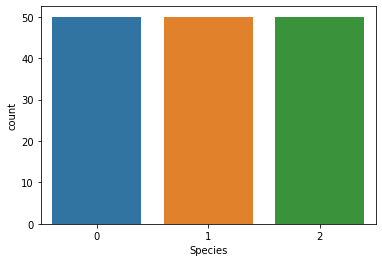

In [89]:
sns.countplot(y)

### Plot the distribution of target variable using histogram

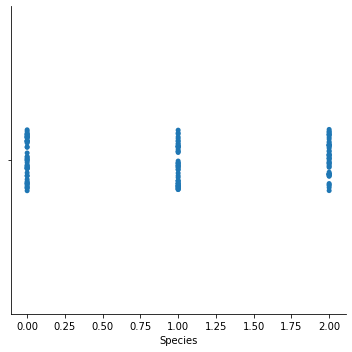

In [90]:
sns.catplot(x ='Species', data=iris)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

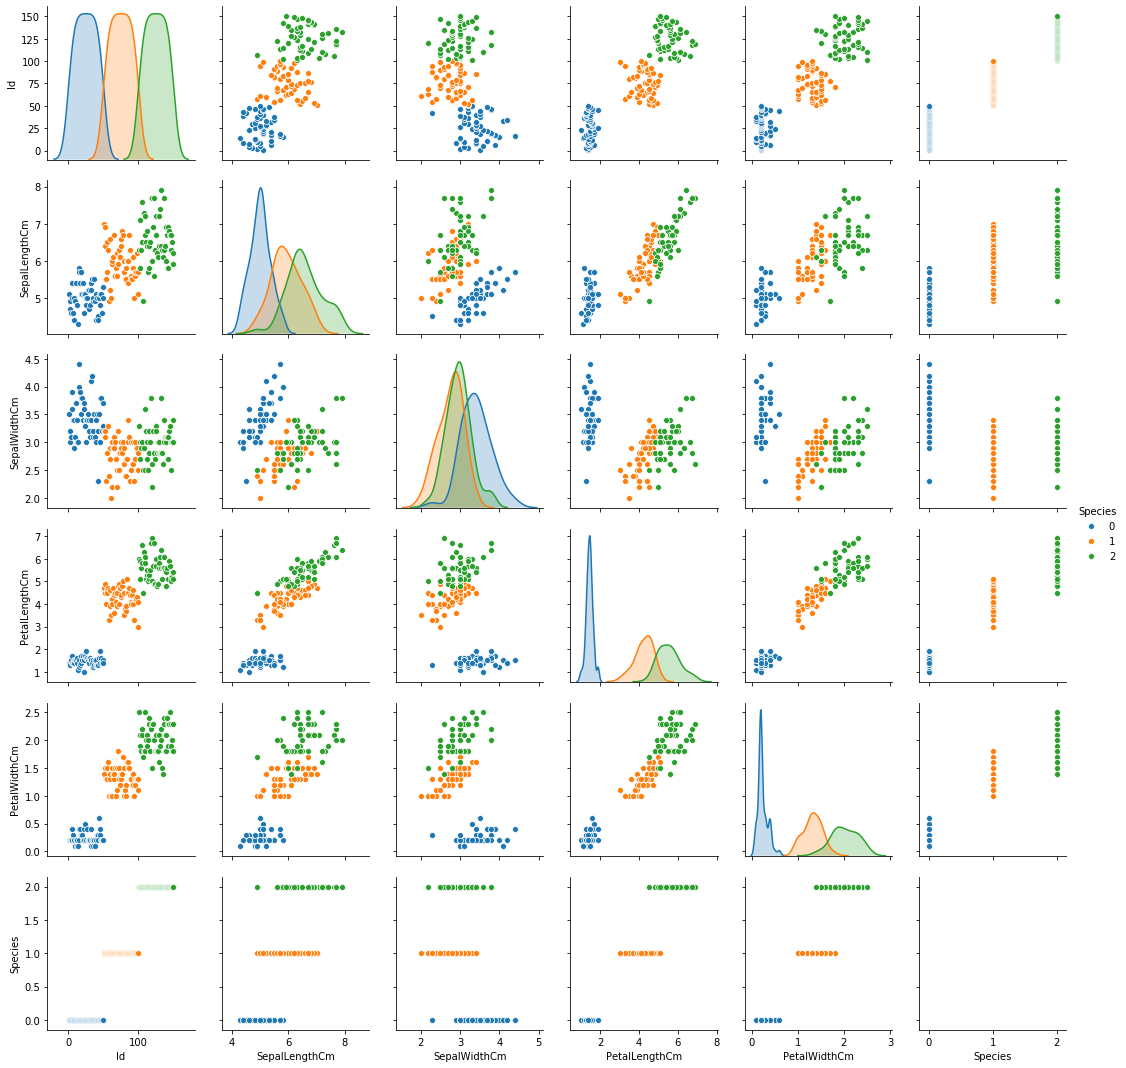

In [92]:
sns.pairplot(iris, hue='Species')

### Insights from the distributions of variables:
- ID may not be the right variable and it should be ignored in the analysis
- Distributions of SepalLength, PetalLength and PetalWidth variables are separated and are good candidates for selection
- Distribution of SepalWidth variable is almost overlapping and may not greatly impacting the target variable
- PetalLength and PetalWidth seemed to highly correlated to each other
- From other pairplots, we see clear correlation/segmentation among various features, except probably, between SepalWidth and SepalLength.

### Summary Statistics and explain insights for at least 2 variables

In [94]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


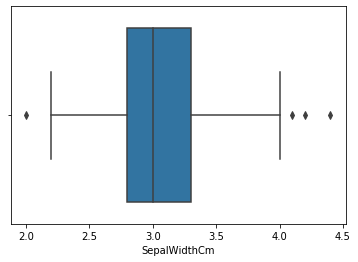

In [95]:
sns.boxplot(iris['SepalWidthCm'])

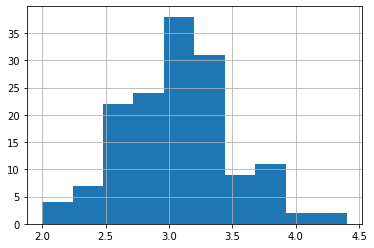

In [96]:
iris.SepalWidthCm.hist()

### Boxplot and statistical measures of SepalWidthCm indicate:
- There are a few outliers on both sides
- Mean is higher than the medium and so the distribution is right-skewed
- Smaller IQR and the histogram pattern shows more number of data points closer to the mean
- The distribution seems to look like a normal distribtion

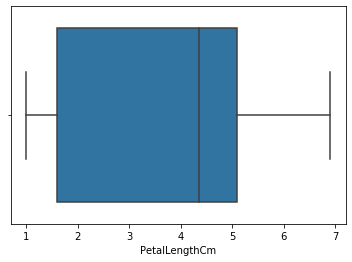

In [99]:
sns.boxplot(iris['PetalLengthCm'])

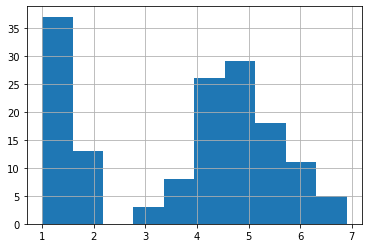

In [100]:
iris.PetalLengthCm.hist()

### Boxplot and Statistical measures for PetalLengthCm indicate:
- Mean is less than the median and so the distribution is left-skewed
- High IQR range and the histogram shows that data points are not closer to the mean
- The distribution doesn't seem to be a normal distribution

### Correlation among all variables and give your insights

In [101]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


### Insights from Correlation matrix:
- PetalLenghtCm and PetalWidthCm are having maximum correlation (0.9627) with each other
- The next highest correlation is between SepalLengthCm and PetalLengthCm (0.872)
- SepalWidthCm is having negative correlation with all other features. Secondly, it's correlation value is lesser than that of other variables. It's having least impact among other variables and may not be the best candidate for prediction
- SepalLengthCm and SepalWidthCm are having least correlation (-0.109) with each other

### Above insights are almost closely matching with the ones drawn from pairplot above 

### Split data in Training and Validation in 80:20

In [102]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [104]:
X_train.shape, X_test.shape

((120, 5), (30, 5))

In [105]:
y_train.shape, y_test.shape

((120,), (30,))

### Do Feature Scaling

In [106]:
# Doing Feature Scaling by Standard Scaler
sc = StandardScaler()

sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

### There are three popular types of NaiveBayes model: Gaussian, MultiVariate and MultiBinomial.
- Gaussian is used for Continuous data
- MultiVariate is used for Descrete data
- MultiBinomial is used for Binary data i.e. Text classification where many 0 and 1 present.

### In this problem, since all features are of Continuous type, we will use Gaussian model.

In [110]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(scaledX_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
predict = gaussian.predict(scaledX_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [112]:
print('Accuracy of the training data: ', gaussian.score(scaledX_train, y_train))
print('Accuracy of the testing data: ', gaussian.score(scaledX_test, y_test))

Accuracy of the training data:  0.9916666666666667
Accuracy of the testing data:  1.0


In [113]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model: ', accuracy_score(y_test, predict))

Accuracy of the model:  1.0


In [117]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
confusion_matrix(y_test, predict)

Confusion Matrix:


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Interpretation of Accuracy and Confusion Matrix:
- Accuracy of the model is 100%; which means, the model is perfectly making the prediction for the test data
- Precision, Recall and F1 score are also maximum
- Confusion matrix is diagonal matrix which means all True values are correctly predicted
- This is also evident from the pairplot also where all classes are nicely separated by most of the features (except the SepalWidthCm)